<a href="https://colab.research.google.com/github/rohithnagabhyrava/INFO7374/blob/master/Assignment%201/Assignment1_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Keras, build a MLP to classify the CIFAR-10 dataset. Note that each record is of size
1*3072. Starting with the MNIST example code, build a MLP to classify the data into the 10
classes.**

Modify the following parameters and discuss the effect of changing parameters on loss and
accuracy.
1. No of epochs
2. Batch size
3. Network configuration
a. Number of neurons in a layer
b. Number of layers
4. Learning rate
5. Activation functions
6. Dropout rates

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from keras.datasets import cifar10

In [0]:
# Load train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Looking into the data

In [0]:
print("train_images.shape: {}\ntrain_labels.shape: {}\ntest_images.shape: {}\ntest_labels.shape: {}"
      .format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

train_images.shape: (50000, 32, 32, 3)
train_labels.shape: (50000, 1)
test_images.shape: (10000, 32, 32, 3)
test_labels.shape: (10000, 1)


## Processing and Normalizing the data

In [0]:
num_pixels = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
#num_pixels

from keras.utils.np_utils import to_categorical
train_images = x_train.reshape(len(x_train), num_pixels).astype("float32")/255 # Reshaping and normalizing the data
test_images = x_test.reshape(len(x_test),num_pixels).astype("float32")/255
train_labels = to_categorical(y_train) # Converting the labels into an array of 10 dimension
test_labels = to_categorical(y_test)

print("train_images.shape: {}\ntrain_labels.shape: {}\ntest_images.shape: {}\ntest_labels.shape: {}".format(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape))


train_images.shape: (50000, 3072)
train_labels.shape: (50000, 10)
test_images.shape: (10000, 3072)
test_labels.shape: (10000, 10)


In [0]:
num_classes = train_labels.shape[1]

##  Define the Model

In [0]:
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
n_epochs = 100 #int(input(print('Enter number of Epochs:')))
batch_size = 500 #int(input(print('Enter number of batch_size')))


model = Sequential()
model.add(Dense(num_pixels, input_dim= num_pixels, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(int(num_pixels/3), activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))
sgd = optimizers.SGD(lr=0.01, nesterov=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dropout_5 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                10250     
Total params: 12,597,258
Trainable params: 12,597,258
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
                 metrics=['accuracy'],optimizer=sgd)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dropout_5 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                10250     
Total params: 12,597,258
Trainable params: 12,597,258
Non-trainable params: 0
_________________________________________________________________


In [0]:
 history = model.fit(train_images, train_labels,
                        batch_size=batch_size,
                        epochs=50,
                        verbose=1,
                        validation_data=(test_images, test_labels))

loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.2587 - acc: 0.1750 - val_loss: 2.0171 - val_acc: 0.2926
Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.0557 - acc: 0.2529 - val_loss: 1.9222 - val_acc: 0.3327
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9817 - acc: 0.2841 - val_loss: 1.8728 - val_acc: 0.3465
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9305 - acc: 0.3074 - val_loss: 1.8430 - val_acc: 0.3565
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9021 - acc: 0.3203 - val_loss: 1.8162 - val_acc: 0.3666
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8723 - acc: 0.3328 - val_loss: 1.7890 - val_acc: 0.3789
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8510 - acc: 0.3398 - val_loss: 1.7714 - val_acc

In [0]:
loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Test loss: 1.473716296195984
Test acc: 0.4813


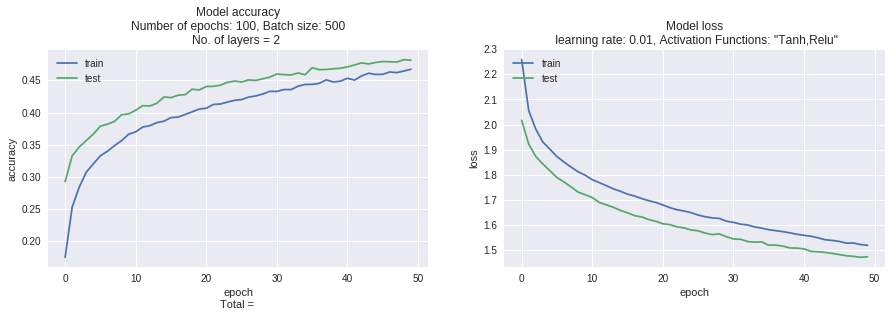

In [0]:
# summarize history for accuracy
f = plt.figure(figsize=(15, 4))
f.add_subplot(1,2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model accuracy\nNumber of epochs: {}, Batch size: {}\nNo. of layers = 2 ".format(n_epochs,batch_size))
plt.ylabel('accuracy')
plt.xlabel('epoch\nTotal = ')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
f.add_subplot(1,2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss\n learning rate: 0.01, Activation Functions: "Tanh,Relu"')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();